In [424]:
from neo4j import GraphDatabase,basic_auth

driver = GraphDatabase.driver(uri = "bolt://localhost:7687", auth=basic_auth("neo4j", "admin"))
session=driver.session()
print(session)

In [426]:

friends_ids

[1, 2, 3, 4, 5]

In [455]:
user_id=10
friends_ids=[str(i) for i in range(0,4)]


# assume friends_ids is a list of user_id values for friends of a given user
with driver.session() as session:

    query = "MERGE (a:User {id:$user_id,id_str:$user_id,MongoCol: $mongo_col}) " \
            "WITH a " \
            "UNWIND $friend_ids as friend_id " \
            "MERGE (b:User {id:friend_id, id_str:friend_id, MongoCol: $mongo_col}) " \
            "MERGE (a)<-[:FOLLOWS]-(b)"
    result = session.run(query, user_id=str(user_id), friend_ids=(friends_ids),
                         mongo_col='test')


In [71]:
import DataExtraction.DocUploader  as loader
import pymongo
connectionString="mongodb://localhost:27017/"
myclient = pymongo.MongoClient(connectionString)
mydb = myclient["PhemeDataset"]


In [72]:
print(mydb.list_collection_names())

['ebola_essien', 'users']


In [88]:

import pandas as pd
mycol=mydb['users']
myquery = { "id": 8 }


print(mycol.count_documents(myquery))




0


In [51]:
import os
import json


Source='all-rnr-annotated-threads'


arr = os.listdir(Source)
DatasetName=['ebola-essien']
for dataset in (DatasetName):

    
        types=['rumours','non-rumours']
        for type in types:
            print(type,': ')
            path=f'{Source}/{dataset}-all-rnr-threads/{type}'
            for folder in (os.listdir(path)):
                if not os.path.isfile(folder):
                    with open(f'{path}/{folder}/source-tweets/{folder}.json') as f:
                        
                        data = json.load(f)
                        
                        data['annotation']=type
                        print('\tsource ',data["id"],data["in_reply_to_status_id"])
                        
                        
                    for tweet in (os.listdir(f'{path}/{folder}/reactions')):
                        with open(f'{path}/{folder}/reactions/{tweet}') as f:
                            data = json.load(f)
                            data['annotation']=type
                            print('\t\tfrom',folder,data["id"],' === ',data['in_reply_to_status_id'])
                            



rumours : 
	source  521369179392581632 None
		from 521369179392581632 521410632953131008  ===  521369179392581632
		from 521369179392581632 521373142347153409  ===  521369179392581632
		from 521369179392581632 521369380249432064  ===  521369179392581632
		from 521369179392581632 521370496928337920  ===  521369179392581632
		from 521369179392581632 521370224256614400  ===  521370061550809088
		from 521369179392581632 521370771793670144  ===  521370224256614400
		from 521369179392581632 521378607231279104  ===  521369179392581632
		from 521369179392581632 521370530134626307  ===  521370224256614400
		from 521369179392581632 521373433654157312  ===  521369179392581632
		from 521369179392581632 521369485144387584  ===  521369179392581632
		from 521369179392581632 521370061550809088  ===  521369179392581632
		from 521369179392581632 521369671975858176  ===  521369179392581632
		from 521369179392581632 521372372927266817  ===  521369179392581632
		from 521369179392581632 521373960509079552  

In [3]:
API_credentials={
'consumer_key' : "2nyGsL1XyRXFGMw0MXbvm7cnY",
'consumer_secret' : "SPTXJkrZfukdZ4gnhYZVgOmpvEbE9Z1lKwxjRHOxbbucidENzs",
'access_key' : "2275955796-bcNPjJsfAWdzG1dJrd7AqjzoWgsEP83XgxYNIaq",
'access_secret' : "IhzSm6k7GyqndpqrSPgypQDIm93uMjaBRkRw431TABLSE"}



# MongoDB credentials
mongo_uri = "mongodb://localhost:27017/"

# Neo4j credentials
neo_uri = "bolt://localhost:7687"
neo_user = "neo4j"
neo_password = "admin"

In [4]:
from DataExtraction.TwitterExtractor import  TweetExtractor

mongo_db = "twitter_db"
mongo_user = "AlgeriaTwitterGraph"
Extractor =TweetExtractor(mongo_uri,neo_uri,neo_user,neo_password,API_credentials)

Initn Extractore
Init Extractore End


In [5]:
db = Extractor.DocGB_Driver.myclient[mongo_db]
user_collection = db[mongo_user]

In [127]:
user_collection.insert_one({'name':15})

In [6]:
user = Extractor.api.get_user(id=2559339292 )._json
user


{'id': 2559339292,
 'id_str': '2559339292',
 'name': 'Anis Rahmani أنيس',
 'screen_name': 'anisrahmanidz',
 'location': 'Algeria',
 'profile_location': None,
 'description': 'صحافي📺رئيس مدير عام النهار 🇩🇿 CEO Ennahar Tv News Channel',
 'url': 'https://t.co/USI8h6zNIc',
 'entities': {'url': {'urls': [{'url': 'https://t.co/USI8h6zNIc',
     'expanded_url': 'https://www.anisrahmani.com/fr/',
     'display_url': 'anisrahmani.com/fr/',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 50395,
 'friends_count': 596,
 'listed_count': 45,
 'created_at': 'Thu May 22 20:16:17 +0000 2014',
 'favourites_count': 10707,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 5854,
 'lang': None,
 'status': {'created_at': 'Tue Feb 11 23:59:24 +0000 2020',
  'id': 1227381653858848768,
  'id_str': '1227381653858848768',
  'text': 'RT @amirdechicha: لقد إنتهى عهد الديناصورات  😂😂😂😂\nتوتو المدعوة نغزة الصحفي أسف

In [208]:
user['_id'] = user['id']
user['mongoCol'] = mongo_user



In [7]:
user_collection.insert_one(user)

In [16]:

query = """
MERGE (u:User {
  id: $user_id,
  screen_name:$screen_name,
  MongoCol: $mongo_col,
  Checked: $checked
})
"""
      
session.run(query,
            user_id=str(user['id']),
           screen_name=user['screen_name'],
            mongo_col=mongo_user,
            checked=False
            )

In [12]:

session.run(""" MATCH (u:User {id: $user_id})
        SET u.screen_name=$screen_name,  
            u.id_str= $id_str,
            u.followers_count= $followers_count,
            u.location= $location,
            u.friends_count= $friends_count,
            u.MongoCol= $mongo_col,
            u.Checked= $checked,
            u.LocationChecked=$LocationChecked 
        RETURN u""",
        screen_name=user['screen_name'],
        user_id=str(user['id']),
        id_str=user['id_str'],
        followers_count=user['followers_count'],
        location=user['location'],
        friends_count=user['friends_count'],
        mongo_col=mongo_user,
        checked=True,
        LocationChecked=True
        )

In [231]:
query = "MATCH (u:User {Checked: false}) RETURN u.id AS id"

# Retrieve user IDs from Neo4j
result = session.run(query)
user_ids = [record["id"] for record in result]
user_ids

['338985020',
 '3052435662',
 '1413598068340142082',
 '1294254672006586369',
 '844644832459018240',
 '1433492626347548679',
 '984535491491127296',
 '1134165554263199746',
 '1369290530442670081',
 '1428707813442920454',
 '577148012',
 '1070246966565720064',
 '1069954016304644096',
 '1069907562286497792',
 '1045609512923795456',
 '825477813750923264',
 '1066231277794267141',
 '1068917375477657600',
 '1528918206',
 '1032984505',
 '1065665346357682176',
 '1068373803141607424',
 '2856592148',
 '1016077086992359426',
 '1589062224',
 '1055106886444429313',
 '736845362858721280',
 1607091320123789312,
 '53059376',
 '216289357',
 '820521182',
 '43002762',
 '751532665556332544',
 '727935997',
 '153436029',
 '587463737',
 '65391168',
 '1105927356261249028',
 '2902105451',
 '1084121000558710785',
 '1043264654716424193',
 '1116620915326873601',
 '5536782',
 '260539856',
 '116393932',
 '2229718597',
 '576241232',
 '1436122237',
 '80208595',
 '520547057',
 '105570727',
 '2988022205',
 '1375451460',
 

In [225]:
# Retrieve user's  from Twitter API
user_id=user_ids[0]
user = Extractor.api.get_user(user_id)._json
user['_id'] = user['id']
user['mongoCol'] = mongo_user
# user_collection.insert_one(user)
session.run(""" MATCH (u:User {id: $user_id})
            SET   
                u.id_str= $id_str,
                u.followers_count= $followers_count,
                u.location= $location,
                u.friends_count= $friends_count,
                u.MongoCol= $mongo_col,
                u.Checked= $checked 
            RETURN u""",
            user_id=338985020,
            id_str=user['id_str'],
            followers_count=user['followers_count'],
            location=user['location'],
            friends_count=user['friends_count'],
            mongo_col=mongo_user,
            checked=True
            )

In [180]:
import tweepy
import time

In [226]:
# Get Friends IDs
for friend_id in tweepy.Cursor(Extractor.api.friends_ids, user_id=user_id).items():
    try:
        friend_id = str(friend_id)
        with Extractor.graphDB_Driver.driver.session() as session:
            result = session.run("MERGE (a:User {id: $user_id}) "
                                "MERGE (b:User {id: $friend_id ,MongoCol: $mongo_col, Checked: $checked}) "
                                "MERGE (a)-[:FOLLOWS]->(b)", 
                                user_id=user_id, friend_id=friend_id,mongo_col=mongo_user,checked=False)
    except tweepy.TweepError as e:
        print(f"Error fetching friends/followers of user {user_id}: {str(e)}")
        if "Rate limit exceeded" in str(e):
            print("Waiting for rate limit to reset...")
            time.sleep(60 * 15) # wait for 15 minutes

In [227]:
# Get Followers IDs
for follower_id in tweepy.Cursor(Extractor.api.followers_ids, user_id=user_id).items():
    try:
        follower_id = str(follower_id)
        with Extractor.graphDB_Driver.driver.session() as session:
            result = session.run("MERGE (a:User {id: $user_id}) "
                                "MERGE (b:User {id: $follower_id,MongoCol: $mongo_col, Checked: $checked}) "
                                "MERGE (b)-[:FOLLOWS]->(a)", 
                                user_id=user_id, follower_id=follower_id,mongo_col=mongo_user,checked=False)
    except tweepy.TweepError as e:
        print(f"Error fetching friends/followers of user {user_id}: {str(e)}")
        if "429" in str(e):
            print("Waiting for rate limit to reset...")
            time.sleep(60 * 15) # wait for 15 minutes


In [229]:
with open("./Data/Algerie.txt", "r") as fp:
      Algerie = json.load(fp)

In [244]:
user = Extractor.api.get_user(338985020)._json

r= session.run(""" MATCH (u:User {id: $user_id})
            SET   
                u.id_str= $id_str,
                u.followers_count= $followers_count,
                u.location= $location,
                u.friends_count= $friends_count,
                u.MongoCol= $mongo_col,
                u.Checked= $checked 
            """,
            user_id=str(user['id']),
            id_str=user['id_str'],
            followers_count=user['followers_count'],
            location=user['location'],
            friends_count=user['friends_count'],
            mongo_col=mongo_user,
            checked=False
            )
r= session.run("""MATCH (n:User{id: $user_id})  RETURN n""",user_id=user['id']  )  
for u in r:
    print(r)   
 

In [45]:
from pymongo import MongoClient
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer
import matplotlib.pyplot as plt

In [30]:
print (stopwords)
nltk.download('stopwords')
print (stopwords)

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>
<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>


[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:

# Extract tweets from MongoDB
tweets = []
for tweet in collection.find():
    if tweet['lang']=='ar':
        tweets.append(tweet['text'])
for i in range(0,5):
    print(tweets[i])  
print(len(tweets))

شاهد تقرير المغاربية: حراك الجزائريين.. وامتحان "الجزائر الجديدة" حاليا

✍ شاركونا بآرائكم في التعاليق 👇🏼👇🏼👇🏼… https://t.co/rgFIMPDZx8
قلناها في الميدان 
#الذكرى_الرابعة_للحراك
#حراك_22_فيفري
#الحراك_الشعبي https://t.co/xsivD7yjHF https://t.co/TPXesW5OnG
RT @samgroom2: #الذكرى_الرابعة_لحراك_22_فيفري_2019
هكذا بدأ حراكنا المبارك في جمعة مباركة ضد العصابة المتحكمة في رقابنا،و المتجددة  و نحن ل…
RT @samgroom2: #الذكرى_الرابعة_لحراك_22_فيفري_2019
هكذا بدأ حراكنا المبارك في جمعة مباركة ضد العصابة المتحكمة في رقابنا،و المتجددة  و نحن ل…
#الذكرى_الرابعة_لحراك_22_فيفري_2019
هكذا بدأ حراكنا المبارك في جمعة مباركة ضد العصابة المتحكمة في رقابنا،و المتجددة… https://t.co/vk62CQQbUa
2226


In [58]:
import string
from nltk.stem import SnowballStemmer
stop_words = set(stopwords.words('french'))
stemmer = FrenchStemmer()

# Preprocess the text of the tweets
processed_tweets = []
for tweet in tweets:
    # Replace any URLs in the tweet with the string 'URL'
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'RT', '', tweet)
    # Tokenize the tweet into individual words
    words = nltk.word_tokenize(tweet.lower())
    # Remove stop words
    words = [w for w in words if w not in stop_words and w not in string.punctuation]
    # Stem or lemmatize the words
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a single string
    processed_tweet = ' '.join(words)
    processed_tweets.append(processed_tweet)

# Count the frequency of each word
word_counts = {}
for tweet in processed_tweets:
    for word in tweet.split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1



In [69]:
import arabic_reshaper
# Count the frequency of each word
word_counts = {}
for tweet in processed_tweets:
    
    for word in tweet.split():
        word_re = arabic_reshaper.reshape(word)
        if word_re in word_counts:
            word_counts[word_re] += 1
        else:
            word_counts[word_re] = 1
        

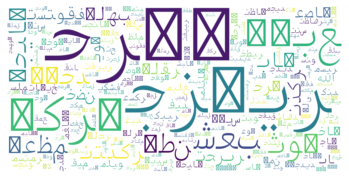

In [70]:


# Filter out any words you don't want to include in the word cloud
filtered_words = [word for word in word_counts if word not in stop_words and word_counts[word] > 5]

# Create a word cloud from the most frequent words
wordcloud = WordCloud(width=1600, height=800,font_path='font/kawkab-light.ttf', background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

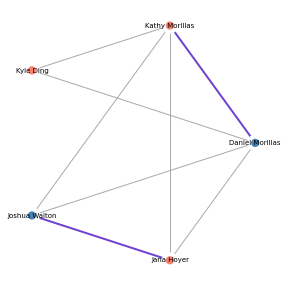

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/igraph/io/files.py:494: RuntimeWarning: The boolean edge attribute 'married' was converted to numeric. at src/io/gml.c:1281
  return writer(f, *args, **kwds)


In [71]:
import igraph as ig
import matplotlib.pyplot as plt

# Construct a graph with 5 vertices
n_vertices = 5
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (3, 4)]
g = ig.Graph(n_vertices, edges)

# Set attributes for the graph, nodes, and edges
g["title"] = "Small Social Network"
g.vs["name"] = ["Daniel Morillas", "Kathy Archer", "Kyle Ding", "Joshua Walton", "Jana Hoyer"]
g.vs["gender"] = ["M", "F", "F", "M", "F"]
g.es["married"] = [False, False, False, False, False, False, False, True]

# Set individual attributes
g.vs[1]["name"] = "Kathy Morillas"
g.es[0]["married"] = True

# Plot in matplotlib
# Note that attributes can be set globally (e.g. vertex_size), or set individually using arrays (e.g. vertex_color)
fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
    g,
    target=ax,
    layout="circle", # print nodes in a circular layout
    vertex_size=0.1,
    vertex_color=["steelblue" if gender == "M" else "salmon" for gender in g.vs["gender"]],
    vertex_frame_width=4.0,
    vertex_frame_color="white",
    vertex_label=g.vs["name"],
    vertex_label_size=7.0,
    edge_width=[2 if married else 1 for married in g.es["married"]],
    edge_color=["#7142cf" if married else "#AAA" for married in g.es["married"]]
)

plt.show()

# Save the graph as an image file
fig.savefig('SimulationResults/social_network.png')
fig.savefig('SimulationResults/social_network.jpg')
fig.savefig('SimulationResults/social_network.pdf')

# Export and import a graph as a GML file.
g.save("SimulationResults/social_network.gml")
g = ig.load("SimulationResults/social_network.gml")

In [72]:
import igraph as ig
import matplotlib.pyplot as plt
import random

In [73]:
ig.config["plotting.backend"] = "matplotlib"
ig.config["plotting.layout"] = "fruchterman_reingold"
ig.config["plotting.palette"] = "rainbow"

In [74]:
ig.config.save()

In [511]:
random.seed(1)
gs = ig.Graph.Barabasi(n=10, m=3)

In [512]:
import numpy as np

node_sizes= gs.degree()



print((node_sizes[:10]))
node_sizes=(np.log(np.array(node_sizes)+1))
node_sizes=list(0.1*node_sizes/max(node_sizes))
print((node_sizes[:10]))


[7, 5, 5, 8, 4, 6, 3, 3, 4, 3]
[0.0946394630357186, 0.08154648767857287, 0.08154648767857287, 0.1, 0.07324867603589635, 0.0885621874580711, 0.06309297535714574, 0.06309297535714574, 0.07324867603589635, 0.06309297535714574]


In [515]:
node_labels=[f"node# {i}" if i % 3 ==0 else '' for i in range(0,100)]
label_color=['red' if i % 2 else 'green' for i in range(0,100) ]
node_colors=['red' if not i % 2 else 'gray' for i in range(0,100) ]
node_labels[:10],label_color[:10],node_colors[:10]

(['node# 0', '', '', 'node# 3', '', '', 'node# 6', '', '', 'node# 9'],
 ['green',
  'red',
  'green',
  'red',
  'green',
  'red',
  'green',
  'red',
  'green',
  'red'],
 ['red', 'gray', 'red', 'gray', 'red', 'gray', 'red', 'gray', 'red', 'gray'])

TypeError: float() argument must be a string or a number, not 'list'

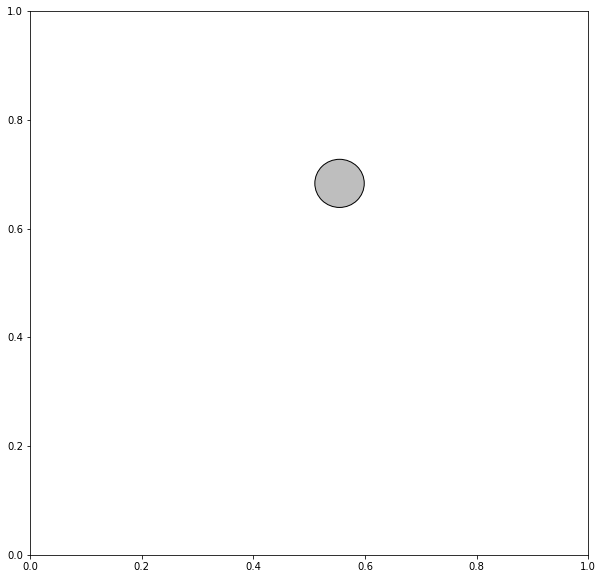

In [531]:

gs.vs["vertex_border_width"] = 5

# Set the visual style of the graph
visual_style = {
    "vertex_size": node_sizes,
    "vertex_border_width":5,
    "vertex_color": node_colors,
    "vertex_label": node_labels,
    "vertex_label_color": "red",
    "edge_width": 0.5,
    "edge_opacity":0.3,
    "node_opacity":0.3,
    "layout": "fruchterman_reingold"
}
fig, ax = plt.subplots(figsize=(10,10))
ig.plot(gs,target=ax,  **visual_style)

fig.savefig('SimulationResults/social_network78.pdf')

plt.show()



In [456]:
from neo4j import GraphDatabase,basic_auth


from igraph import Graph as IGraph
from igraph import plot
driver = GraphDatabase.driver(uri = "bolt://localhost:7687", auth=basic_auth("neo4j", "admin"))

# Define a Cypher query to fetch nodes with 'MongoCol' attribute equal to 'AlgeriaTwitterGraph'

query = """
        MATCH (n:User{MongoCol:"AlgeriaTwitterGraph"})
        RETURN id(n) as id,  n.screen_name as screen_name, n.followers_count as followers_count

"""
session= driver.session() 
Nodes = session.run(query)
query = """

        MATCH (n:User{MongoCol:"AlgeriaTwitterGraph"})-[r]->(m:User{MongoCol:"AlgeriaTwitterGraph"})
        RETURN id(n) as source, id(m) as target


"""

# Execute the query and collect the results



Links = session.run(query)

In [457]:

# Convert the results to a list of dictionaries
nodes = []
links=[]
idx=[]
for record in Nodes:
    nodes.append(record.data())
    idx.append(record.data()['id'])

for record in Links:
    links.append(record.data())
import pickle
with open('Data/GraphData/data.pkl', 'wb') as f:
    pickle.dump((nodes, links, idx), f)

In [469]:
with open('Data/GraphData/data.pkl', 'rb') as f:
    nodes, links, idx = pickle.load(f)

In [458]:
g = ig.Graph()
Ris_nodes=nodes[:1000]
for node in  (nodes):
    g.add_vertex(name=node['id'],name_screen=node['screen_name'], followers=node['followers_count'])

In [ ]:
nodes.index

In [459]:
from tqdm import tqdm
for link in tqdm(links):
   
    try:

        g.add_edge(source=idx.index(link['source']),target= idx.index(link['target']))
    except :
        pass

import pickle
with open('Data/IdsChecked', 'wb') as f:
    pickle.dump(g, f)
  

100%|██████████| 457731/457731 [2:21:49<00:00, 53.79it/s]  


In [488]:
with open('Data/GraphData/graph.pkl', 'rb') as f:
    g = pickle.load(f)

In [489]:
print(g.vcount())

45044


In [1]:
import pickle

In [493]:

print(g.vcount())
# get a list of vertices to delete
vertices_to_delete = [v.index for v in g.vs if v.degree()<50 and v.degree() <= 20]

# delete the vertices from the graph
g.delete_vertices(vertices_to_delete)
print(g.vcount())


2236
2215


In [423]:
l = list(g.degree())
(l.count(4))/g.vcount()


0.07854232684472612

In [224]:
'followers' in g.vs[0].attributes()

True

In [494]:
# Set the size of the nodes according to the followers_count attribute
node_sizes = [ n["followers"] if type( n["followers"])== int and  n["followers"]<6000000 else 1 for n in g.vs]

# Set the color of the nodes according to the followers_count attribute
node_colors = ["green" if type( n["followers"])== int and n["followers"] > 5000 else "grey" for n in g.vs]

# Set the label of the nodes for followers_count > 10000
node_labels = [n["name_screen"] if type( n["followers"])== int and n["followers"] >= 10000 else ""  for n in g.vs]
label_color = ['red' if type( n["followers"])== int and n["followers"] >= 10000 else "grey"  for n in g.vs]

In [477]:
max(node_sizes),min(node_sizes)

(5926290, 0)

In [495]:
import numpy as np
print((node_sizes[:10]))
node_sizes=(np.log(np.array(node_sizes)+1))
node_sizes=list(0.1*node_sizes/max(node_sizes))
print((node_sizes[:10]))

[45, 25, 1800, 1355, 814, 732, 978, 1755, 135, 50395]
[0.02510714729887552, 0.021365675502823166, 0.0491572860243921, 0.04729618703636115, 0.043957611565695554, 0.04326221542746239, 0.045159926569757335, 0.04899135236333222, 0.032215801134528335, 0.07100477800726496]


In [496]:




# Set the visual style of the graph
visual_style = {
    "vertex_size": node_sizes,
    "vertex_color": node_colors,
    "vertex_label": node_labels,
    "vertex_label_color":label_color,
    "vertex_label_size":node_sizes,
    "label_color":label_color,
    "edge_width": 0.01,
    "edge_opacity":0.3,
    "layout": "fruchterman_reingold"
}



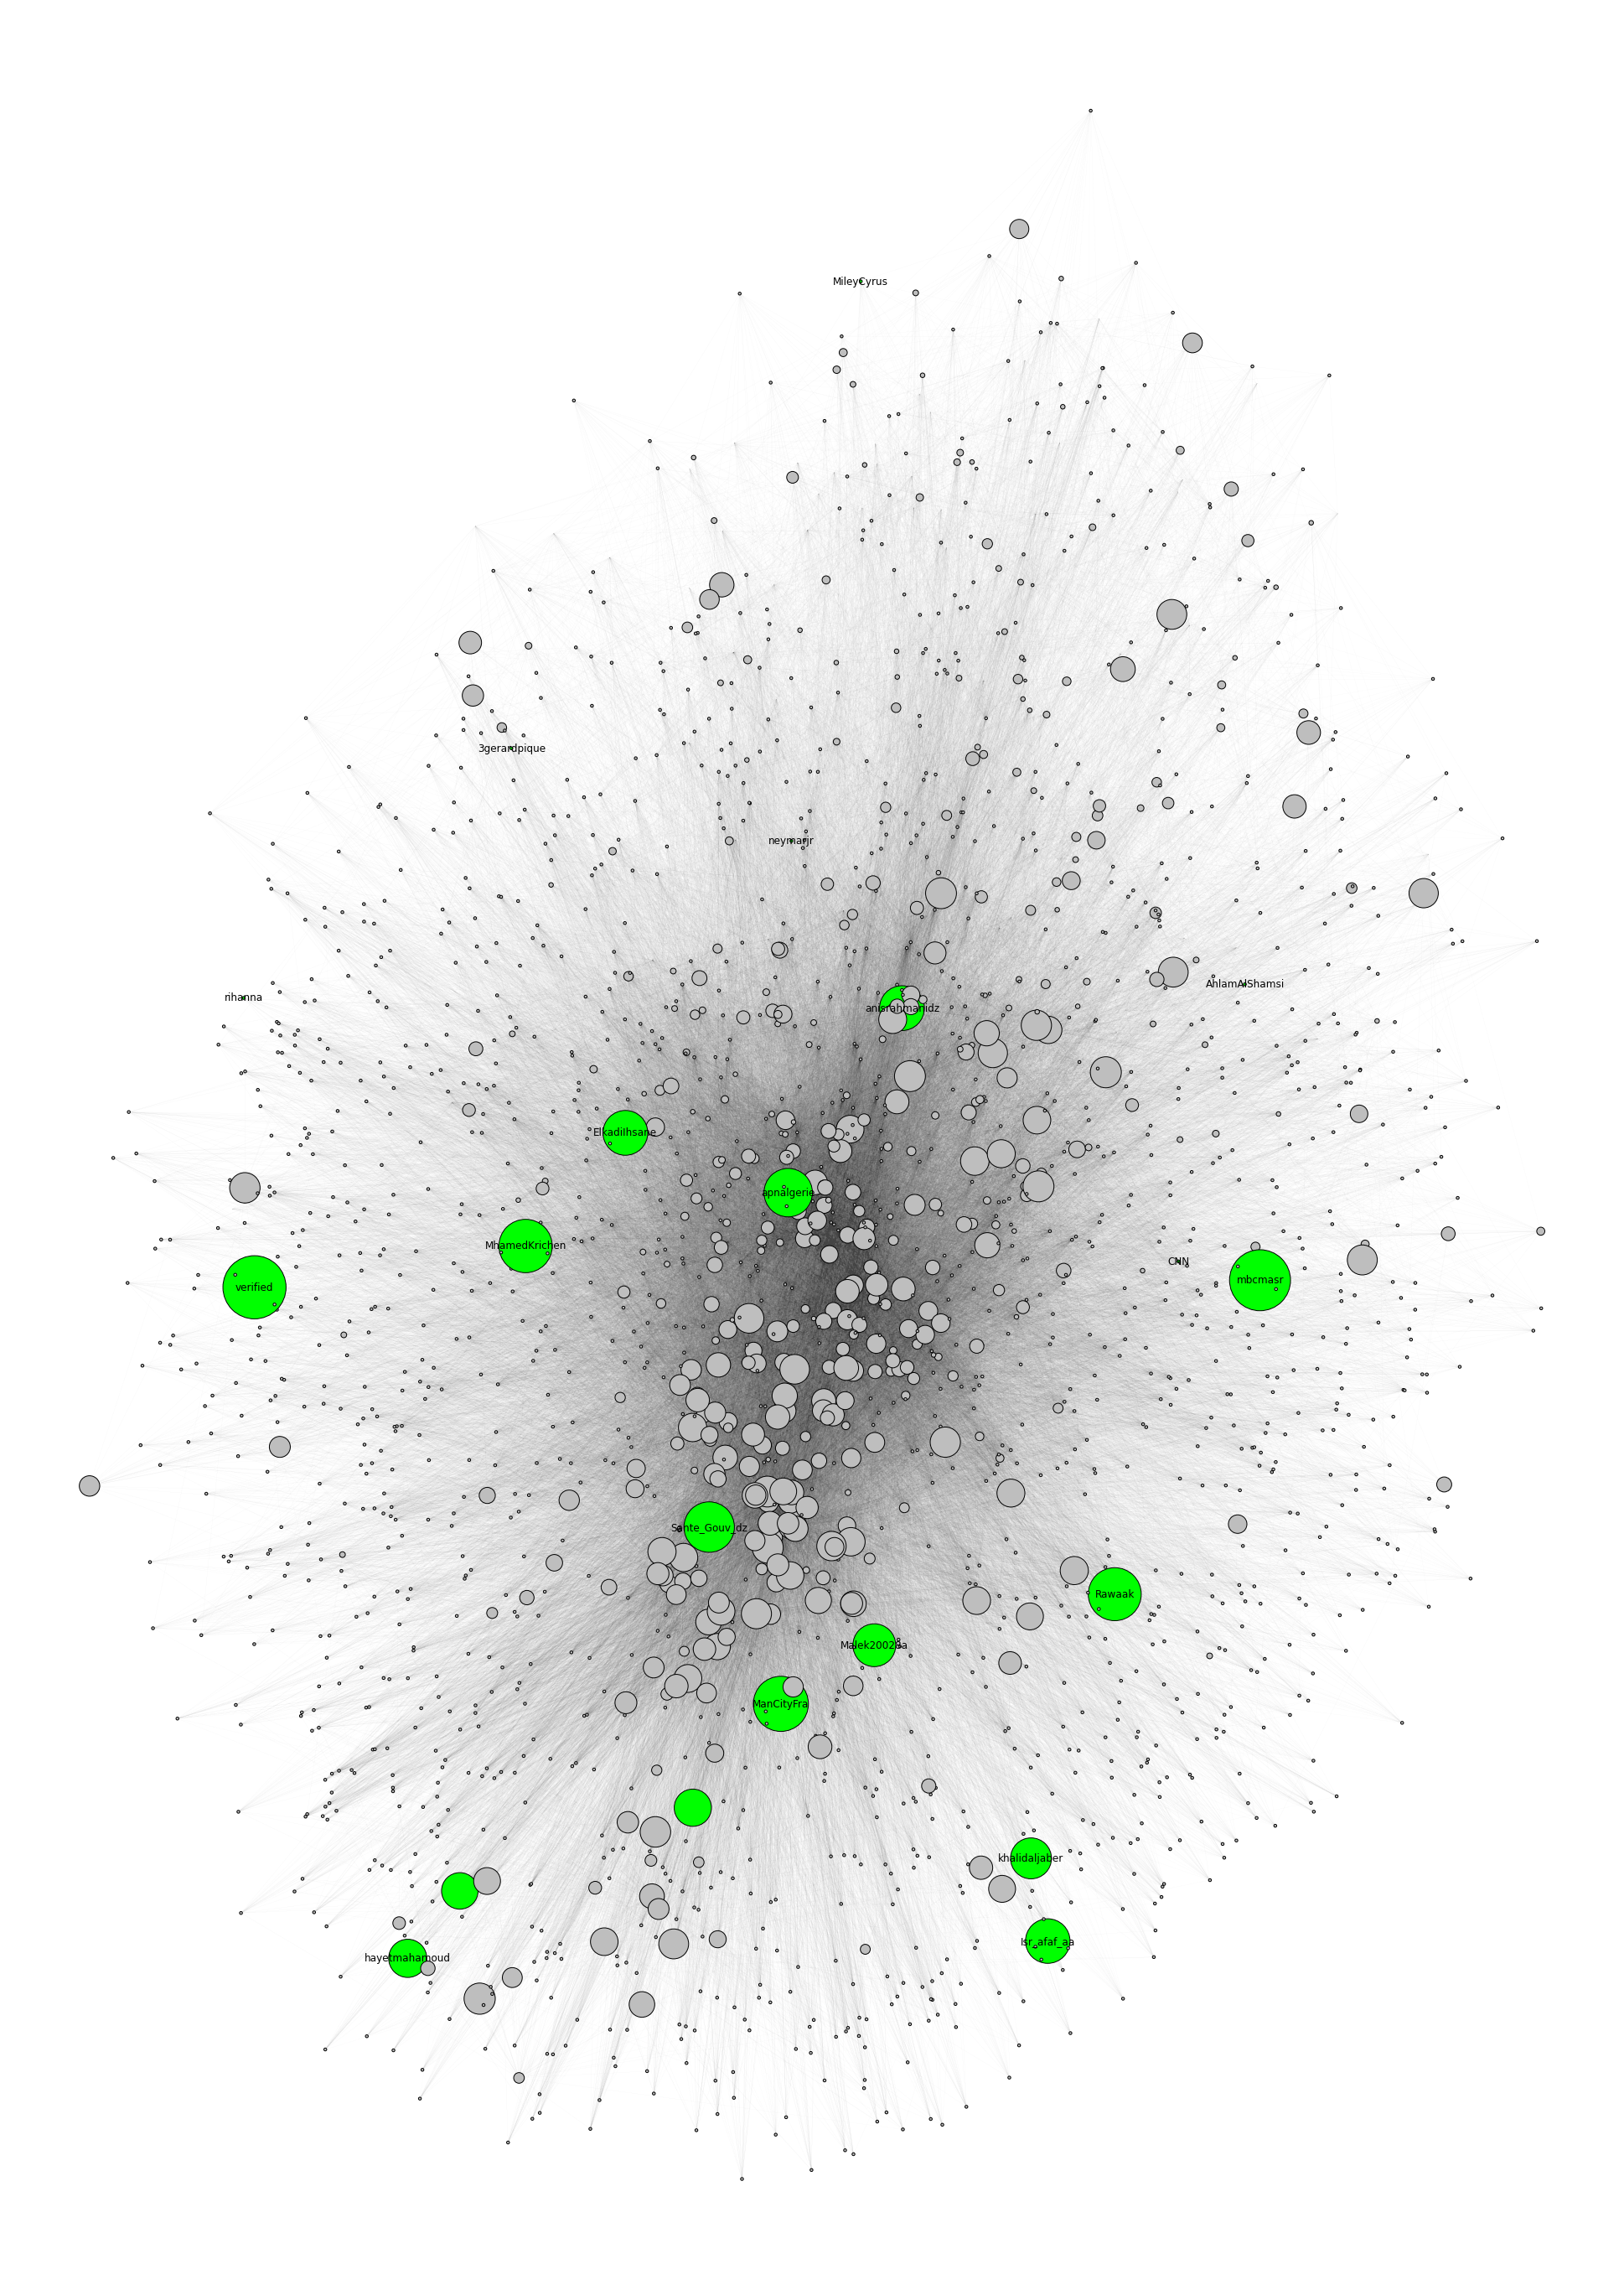

In [497]:
# Plot the graph
fig, ax = plt.subplots(figsize=(50,50))
ig.plot(g,target=ax, **visual_style)
fig.savefig('SimulationResults/Twitter4.pdf')

plt.show()




In [ ]:
import pickle

with open('Data/IdsChecked', 'wb') as f:
    pickle.dump(g, f)